<a href="https://colab.research.google.com/github/danykoud/Crime-visualization-/blob/main/Needleimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import cv2 
import os
import matplotlib.pyplot as plt
from keras import preprocessing
from glob import glob
import random

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Labels.csv')
data.head()
print(data.count())

ID          632
Filename    632
Label       632
dtype: int64


In [ ]:
data[data["Filename"]== "10601.jpg"]

,ID,Filename,Label
302,302,10601.jpg,no


In [ ]:
data.loc[data['Label'] == 'yes','label_encoder']= 1
data.loc[data['Label'] == 'no','label_encoder']= 0


In [ ]:
needleimage = data[data['Label']== 'yes'][["Filename","label_encoder"]]
no_needleimage= data[data['Label']== 'no'][["Filename","label_encoder"]]
needleimage

,Filename,label_encoder
3,20594.jpg,1.0
5,20410.jpg,1.0
6,20408.jpg,1.0
7,20406.jpg,1.0
9,20387.jpg,1.0
...,...,...
616,1255.jpg,1.0
621,1220.jpg,1.0
622,1213.jpg,1.0
627,1177.jpg,1.0


In [ ]:
needimg= np.array(needleimage['Filename'])
label_encod1 = np.array(needleimage['label_encoder'])
no_needimg= np.array(no_needleimage['Filename'])
label_encod2 = np.array(no_needleimage['label_encoder'])
labels = np.concatenate((label_encod1, label_encod2), axis=0)
labels= labels[:, np.newaxis]
labels.shape

(632, 1)

# Needleimages

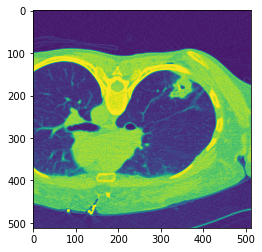

11373.jpg


(512, 512)

In [ ]:
train_path = glob('/content/drive/MyDrive/NeedleImages/NeedleImages/*.*')
im_sv= list(x for x in train_path)
im_path= im_sv[0]
im= cv2.imread(im_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(im)
plt.show()
print(os.path.basename(im_path))
im.shape

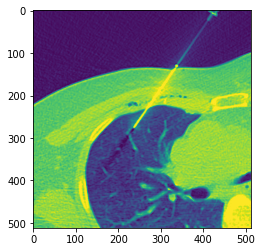

11238.jpg


In [ ]:
need_image= np.array(list(x for x in im_sv if os.path.basename(x) in needimg))
no_need_image= np.array(list(x for x in im_sv if os.path.basename(x) in no_needimg))
nnd_im= no_need_image[5]
nd_im= need_image[5]
im= cv2.imread(nd_im, cv2.IMREAD_GRAYSCALE)
plt.imshow(im)
plt.show()
print(os.path.basename(nd_im))

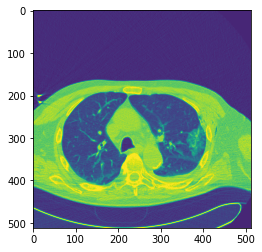

10819.jpg


In [ ]:
im= cv2.imread(nnd_im, cv2.IMREAD_GRAYSCALE)
plt.imshow(im)
plt.show()
print(os.path.basename(nnd_im))

# **Preprocessing**

In [ ]:
from keras import preprocessing
import tensorflow.compat.v2 as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from PIL import Image
from numpy import asarray
from sklearn.utils import shuffle
# Sklearn scaling
from sklearn.preprocessing import MinMaxScaler, LabelEncoder



In [ ]:
# ALTERNATIVE PREPROCESSING METHOD 
# for x in img_data:
#     im=  cv2.imread(x, cv2.IMREAD_GRAYSCALE)
#     img_= np.array(tf.keras.utils.img_to_array(im))
# img_arr= np.reshape(img_, (512,512))
# img_arr.shape

# -----------------------------------2nd ----------------------------------------------
# using PIL
# for x in img_data:
#     img = Image.open(x)
#     img_arr= asarray(img)
# img_arr.shape
# -----------------------------------3rd---------------------------------------------------
# for x in need_image:
#     im=  tf.keras.preprocessing.image.load_img(x, target_size = (img_width, img_height))
#     img_=tf.keras.utils.img_to_array(im)
# y1= np.ones(img_.shape[0])
# print(img_.shape)
# print(y1.shape)

img_width = 520
img_height = 520
dim = (img_width, img_height )

In [ ]:
class_names=['needle image', 'no-needle image']

# **FUNCTIONS**

In [ ]:

def preprocessing(images):
  for x in images:
      im=  cv2.imread(x, cv2.IMREAD_GRAYSCALE)
      res = cv2.resize(im, dim, interpolation=cv2.INTER_LINEAR)
      img_= tf.keras.utils.img_to_array(res)
  img_= np.reshape(img_, dim)
  y1= np.ones(img_.shape[0])
  y0= np.zeros(img_.shape[0])
  return img_ , y1, y0


def combine(a, b):
  return np.concatenate((a, b), axis=0)

def decod_predict(predict):
  if predict== 1 or predict == 1.0:
    return class_names[0]
  elif predict== 0 or predict == 0.0 :
    return class_names[1]
  else:
    print("Sorry couldn't predict" )


In [ ]:

print(f"needle image data shape : {preprocessing(need_image)[0].shape}")
print(f"needle image label shape: {preprocessing(need_image)[1].shape}")
print(f" no-needle image data shape: {preprocessing(no_need_image)[0].shape}")
print(f"no-needle image label shape : {preprocessing(no_need_image)[2].shape}")

needle image data shape : (520, 520)
needle image label shape: (520,)
 no-needle image data shape: (520, 520)
no-needle image label shape : (520,)


In [ ]:
X= combine(preprocessing(need_image)[0], preprocessing(no_need_image)[0])
y= combine(preprocessing(need_image)[1],preprocessing(no_need_image)[2] )
print(f"image data shape : {X.shape}")
print(f"image labels shape : {y.shape}")
print(y)

image data shape : (1040, 520)
image labels shape : (1040,)
[1. 1. 1. ... 0. 0. 0.]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(832, 520)
(832,)


In [ ]:
X_train= np.array(X_train)
y_train= np.array(y_train)
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
# step1: scale X_train and X_test data 
scaler= MinMaxScaler(feature_range=(0,1))
scaled_X_train= scaler.fit_transform(X_train)
scaled_X_test= scaler.fit_transform(X_test)
# print(scaled_X_train[0])
scaled_X_test.shape

(208, 520)

In [ ]:
# Step 2: Turn y data into categorical data
y_train_categorical= to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical[-1]

array([1., 0.], dtype=float32)

In [ ]:
#Time to create a deep network using CNN
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam # - 
from tensorflow.keras.layers import Convolution2D, MaxPooling2D



# **CNN MODEL**

In [ ]:
model = Sequential()

In [ ]:

# Model
number_inputs = 520
number_hidden_nodes = 100
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))
model.add(Dense(units=number_hidden_nodes, activation='relu'))
# model.add(Flatten())
model.add(Dense(units=number_hidden_nodes, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(units=number_hidden_nodes, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(units=95, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(units=75, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(units=45, activation='relu'))
model.add(Dropout(.4))
model.add(Dense(len(class_names), activation = 'softmax')) #sigmoid , softmax


# # Regular model without parameter tuning 
# number_inputs = 520
# number_hidden_nodes = 100
# model.add(Dense(units=number_hidden_nodes,
#                 activation='relu', input_dim=number_inputs))
# model.add(Dense(units=number_hidden_nodes, activation='relu'))
# model.add(Dense(units=75, activation='relu'))
# model.add(Dense(len(class_names), activation = 'softmax')) #sigmoid , softmax


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               52100     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 95)                9

In [ ]:
model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [ ]:
# Fit (train) the model
history= model.fit(
   scaled_X_train,
    y_train_categorical,
    epochs=50,
    shuffle=True,
    validation_split=.3

)

Epoch 1/50
19/19 [==============================] - 3s 15ms/step - loss: 0.6907 - accuracy: 0.5000 - val_loss: 0.6402 - val_accuracy: 0.5400
Epoch 2/50
19/19 [==============================] - 0s 5ms/step - loss: 0.6306 - accuracy: 0.6203 - val_loss: 0.4363 - val_accuracy: 0.8560
Epoch 3/50
19/19 [==============================] - 0s 8ms/step - loss: 0.3629 - accuracy: 0.8419 - val_loss: 0.1972 - val_accuracy: 0.8880
Epoch 4/50
19/19 [==============================] - 0s 6ms/step - loss: 0.2352 - accuracy: 0.8883 - val_loss: 0.1686 - val_accuracy: 0.9080
Epoch 5/50
19/19 [==============================] - 0s 5ms/step - loss: 0.2177 - accuracy: 0.8935 - val_loss: 0.1961 - val_accuracy: 0.8960
Epoch 6/50
19/19 [==============================] - 0s 5ms/step - loss: 0.2943 - accuracy: 0.8540 - val_loss: 0.1949 - val_accuracy: 0.8840
Epoch 7/50
19/19 [==============================] - 0s 5ms/step - loss: 0.2022 - accuracy: 0.8918 - val_loss: 0.1870 - val_accuracy: 0.8840
Epoch 8/50
19/19 [=

# Compare the models below

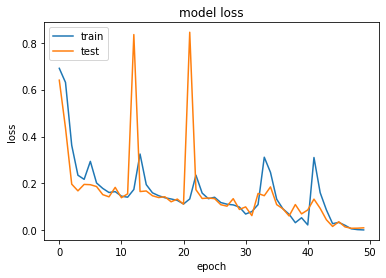

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

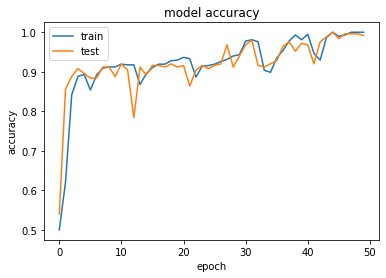

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:

model_loss, model_accuracy = model.evaluate(
    scaled_X_test, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

7/7 - 0s - loss: 0.1052 - accuracy: 0.9519 - 35ms/epoch - 5ms/step
Normal Neural Network - Loss: 0.10524673014879227, Accuracy: 0.9519230723381042


In [ ]:
predict_x=model.predict(scaled_X_test[90:99]) 
classes_x=np.argmax(predict_x,axis=1)


In [ ]:
print(f"Predicted classes: {list(map(decod_predict,classes_x))}")
print(f"Actual Labels: {list(map(decod_predict, y_test[90:99]))}")

Predicted classes: ['no-needle image', 'no-needle image', 'needle image', 'needle image', 'no-needle image', 'needle image', 'needle image', 'no-needle image', 'no-needle image']
Actual Labels: ['no-needle image', 'no-needle image', 'needle image', 'needle image', 'no-needle image', 'needle image', 'needle image', 'no-needle image', 'no-needle image']


In [ ]:
# Save the model
model.save("needle_model_trained.h5")

In [ ]:
# Load the model
from tensorflow.keras.models import load_model
nd_model = load_model("needle_model_trained.h5")

In [ ]:
model_loss, model_accuracy = nd_model.evaluate(
    scaled_X_test, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

7/7 - 0s - loss: 0.1052 - accuracy: 0.9519 - 157ms/epoch - 22ms/step
Normal Neural Network - Loss: 0.10524673014879227, Accuracy: 0.9519230723381042


Text(0, 0.5, 'True Positive Rate')

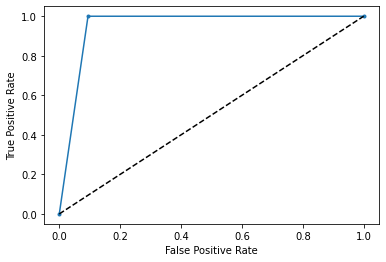

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred = model.predict(scaled_X_test)

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(np.argmax(y_test_categorical, axis=1), np.argmax(y_pred, axis=1))
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')